In [35]:
import pandas as pd
import pickle
import json
import seaborn as sns
import pprint
import numpy as np
pp = pprint.PrettyPrinter(depth=6)
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (15.0, 5.0)
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 200)

In [36]:
pkl_folder = "../../pkl"
csv_folder = "../../csv"
figure_folder = "../../figures/tags_analysis"

In [37]:
import git
git = git.Git("../../../sonarqube/") 

### Import tags

In [38]:
alltags = pd.read_csv(f"{csv_folder}/tags.csv", index_col=0)
alltags.Date = pd.to_datetime(alltags.Date)
alltags["month"] = alltags.Date.dt.month
alltags["year"] = alltags.Date.dt.year
tags = alltags.tail(-1)
tags.head()

,Tag,Sha,Date,Tag_number,month,year
1,8.4.2.36762,2de1f343e3dbd9e88007b42e475512677c04eb8a,2020-08-27 14:11:31,8.4.2.36762,8,2020
2,8.4.1.35646,a0d372f704998d38856c26e28662fd7de062f873,2020-07-14 08:13:18,8.4.1.35646,7,2020
3,8.4.0.35506,74b4533439f380827d68e8c01667eeaecad89fc7,2020-07-03 07:09:27,8.4.0.35506,7,2020
4,8.3.1.34397,b77ce511a2039330aea8832ad12e86a8cfa9ff7d,2020-05-07 12:09:22,8.3.1.34397,5,2020
5,8.3.0.34182,9c58e36328ae79ad3c36c13aa253879351ce3613,2020-04-28 13:54:13,8.3.0.34182,4,2020


### Shape

In [39]:
tags.shape

(185, 6)

### Columns

In [40]:
tags.columns

Index(['Tag', 'Sha', 'Date', 'Tag_number', 'month', 'year'], dtype='object')

### Filter the ones after the project started using TravisCI

In [41]:
tags = tags[tags.Date > "2015-03-10"]

In [42]:
tags.Tag.nunique()

120

### Statistical summary

In [43]:
tags.describe()

,month,year
count,120.000000,120.00000
mean,5.566667,2016.75000
std,3.633951,1.34258
min,1.000000,2015.00000
25%,2.000000,2016.00000
50%,5.000000,2016.00000
75%,8.250000,2017.00000
max,12.000000,2020.00000


**Distribution over the years**

<AxesSubplot:xlabel='year', ylabel='Tag'>

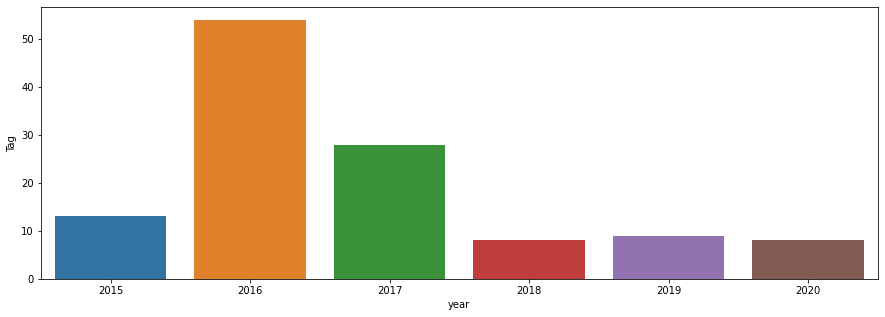

In [44]:
sns.barplot(x="year", y="Tag", data=tags.groupby("year").Tag.count().reset_index())

**Distribution overtime of the releases**

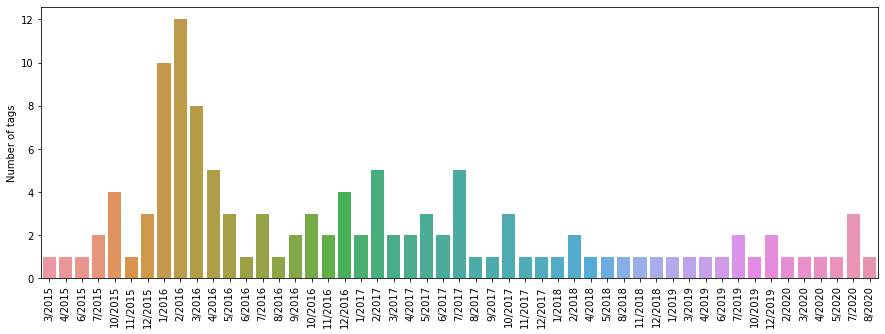

In [73]:
time_group = ["year", "month"]
x = tags.groupby(time_group).Tag.count().reset_index()
ax = sns.barplot(x=x.index, y=x.Tag)
ax.set_xticklabels(list(x[time_group[1]].astype(int).astype(str) + "/" + x[time_group[0]].astype(int).astype(str)),
                      rotation=90)
ax.set(ylabel="Number of tags")
plt.savefig(f"{figure_folder}/time_distribution.png", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

**Major version counts**

In [46]:
tags["major_version"] = tags.Tag.apply(lambda s: s.split(".")[0])

In [47]:
tags.major_version.value_counts(normalize=True)

5    0.466667
6    0.350000
7    0.091667
8    0.066667
4    0.025000
Name: major_version, dtype: float64

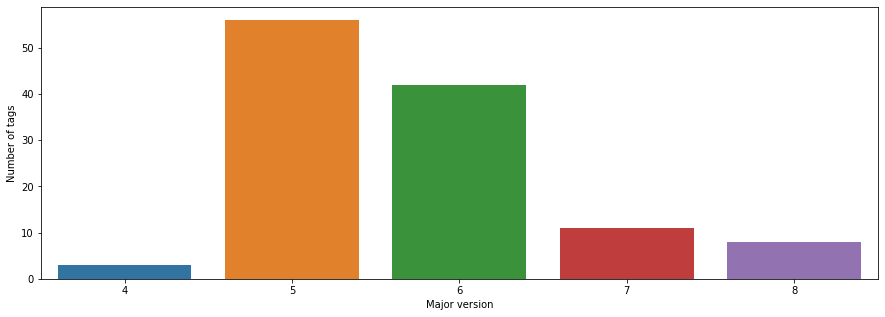

In [50]:
ax = sns.countplot(x=tags.major_version.sort_values())
ax.set_xlabel("Major version")
ax.set_ylabel("Number of tags")
plt.savefig(f"{figure_folder}/major_version.png", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

**Types of releases**

In [52]:
def type_of_release(tag):
    if "RC" in tag:
        return "Release candidate"
    if "M" in tag:
        return "Milestone"
    return "Normal version"

In [53]:
tags["type_of_release"] = tags.Tag.apply(type_of_release)

In [68]:
tags.type_of_release.value_counts(normalize=True)

Normal version       0.483333
Release candidate    0.266667
Milestone            0.250000
Name: type_of_release, dtype: float64

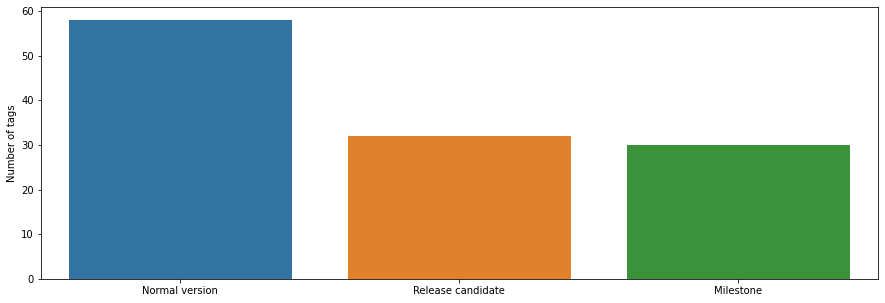

In [55]:
ax = sns.countplot(x=tags.type_of_release.sort_index())
ax.set_xlabel("")
ax.set_ylabel("Number of tags")
plt.savefig(f"{figure_folder}/type_of_releases.png", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

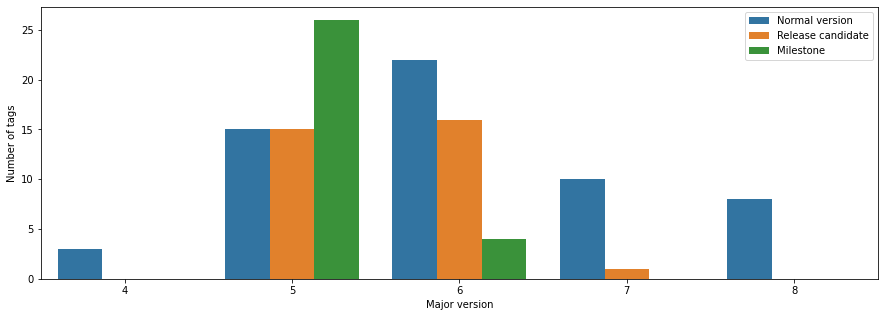

In [74]:
ax =sns.countplot(x="major_version", hue="type_of_release", data=tags, order=["4","5","6","7","8"])
ax.legend(loc="upper right")
ax.set(xlabel="Major version", ylabel="Number of tags")
plt.savefig(f"{figure_folder}/major_type_of_releases.png", transparent=True, bbox_inches='tight', pad_inches=0.2)
plt.show()

In [71]:
tags[tags.type_of_release=="Release candidate"]

,Tag,Sha,Date,Tag_number,month,year,major_version,type_of_release
19,7.0-RC1,b19047de0e815b1c6474770e8bc0fff41daa4d01,2018-01-24 14:36:36,7.0,1,2018,7,Release candidate
28,6.7-RC1,3f72c27bf24dcecfad0e0901797e6d166532de72,2017-10-27 14:27:52,6.7,10,2017,6,Release candidate
30,6.6-RC1,868e9ce285262e5277c158ea3c2082c379e81943,2017-10-10 17:03:23,6.6,10,2017,6,Release candidate
32,6.5-RC2,fa58d92ea7145838c8030fc4611a4bdefe94b5de,2017-07-24 15:42:40,6.5,7,2017,6,Release candidate
33,6.5-RC1,3861f8769afa40e556c63ff7f39a41f9f89f68fa,2017-07-13 17:11:40,6.5,7,2017,6,Release candidate
39,6.4-RC3,1f978d91e82d8ddbe49806ee6d32bc93e8f6a42f,2017-05-29 09:55:18,6.4,5,2017,6,Release candidate
40,6.4-RC2,8e826b1066ffea29958f8c5ac09244baa624dafd,2017-05-22 10:00:44,6.4,5,2017,6,Release candidate
41,6.4-RC1,04b7bf3ccc22daea116a67e6ba174237805e5ccf,2017-05-16 15:00:32,6.4,5,2017,6,Release candidate
48,6.3-RC4,e23682d9e420ef59da282322ca9dc6e3fc59d75b,2017-03-04 17:53:45,6.3,3,2017,6,Release candidate
49,6.3-RC1,534fc279a64c7b836f39d476d15192999944b9eb,2017-02-14 11:06:25,6.3,2,2017,6,Release candidate


### Import tag comparison pairs

In [ ]:
tags_comparison = pd.read_csv(f"{csv_folder}/tags_comparison_final.csv", index_col=0)
tags_comparison.from_commit_date = pd.to_datetime(tags_comparison.from_commit_date)
tags_comparison.to_commit_date = pd.to_datetime(tags_comparison.to_commit_date)
tags_comparison.from_author_date = pd.to_datetime(tags_comparison.from_author_date)
tags_comparison.to_author_date = pd.to_datetime(tags_comparison.to_author_date)
tags_comparison.head()

### Statistical summary

In [ ]:
tags_comparison.describe()

**Distribution of time difference in days between tag pairs**

In [ ]:
tags_comparison.diff_commit_days.describe()

In [ ]:
sns.boxplot(x=tags_comparison.diff_commit_days)

**Do pairs with negative days difference have a behind_by == 1 situation?**

In [ ]:
tags_comparison[tags_comparison.diff_commit_days < 0]

Yes, this is the reason for the negative difference in days

**Pairs below the median**

In [ ]:
len(tags_comparison[tags_comparison.diff_commit_days > tags_comparison.diff_commit_days.median()])

These could possibly be the versions with no bugs/issues reported

**Pais with smallest difference in days**

In [ ]:
tags_comparison.loc[tags_comparison.diff_commit_days.idxmin()]

**Difference in days: pairs outliers**

In [ ]:
tags_comparison[tags_comparison.diff_commit_days > 100]

**Investigate the maximum difference in days value**

In [ ]:
tags_comparison.loc[tags_comparison.diff_commit_days.idxmax()].to_frame()

In [ ]:
compare_tags[compare_tags.to_tag=="7.5"]

We confirm that this is the best pairing. There seem to miss versions between 7.0 and 7.5 but they are not present on GitHub

### Ahead by distribution

In [ ]:
sns.boxplot(x=tags_comparison.ahead_by)

In [ ]:
tags_comparison

**Let's investigate the outliers**

In [ ]:
tags_comparison[tags_comparison.ahead_by > 200][["from_tag", "to_tag", "ahead_by"]]

**Investigate the pairs with smallest ahead_by**

In [ ]:
tags_comparison.sort_values(by="ahead_by").head(5)[["from_tag", "to_tag", "ahead_by"]]

**Investigate minumum ahead_by**

In [ ]:
tags_comparison.loc[tags_comparison.ahead_by.idxmin()].to_frame()

We would expect 6.5-M3 to be paired with 6.5-M2 if it exists. Let's see how 6.5-M3 performed when compared with the other tags.

In [ ]:
compare_tags[(compare_tags.ahead_by>0)&(compare_tags.behind_by<2)]\
[compare_tags.to_tag=="6.5-M3"].sort_values(by="ahead_by").head(5)

6.5-M2 is in the list and is a fast-forward of only 67 commits. However, 6.5-M3 seems more similar to 6.5-RC1. Let's see if 6.5-M2 has been used as "from_tag" and with which tag.

In [ ]:
tags_comparison[tags_comparison.from_tag=="6.5-M2"]

It has been correclty paired with 6.5-RC1.

**Investigate maximum ahead_by**

In [ ]:
tags_comparison.loc[tags_comparison.ahead_by.idxmax()].to_frame()

**Number of ahead commits distribution over time**

In [ ]:
tags_comparison["to_commit_date_month"] = tags_comparison.to_commit_date.dt.month
tags_comparison["to_commit_date_year"] = tags_comparison.to_commit_date.dt.year

data = tags_comparison.groupby(["to_commit_date_year","to_commit_date_month"]).ahead_by.mean().reset_index()
ax = sns.barplot(y = data.ahead_by, x= data.apply(lambda row: f"{str(int(row.to_commit_date_month))}/{str(int(row.to_commit_date_year))}", axis=1))
ax.tick_params(axis='x', labelrotation= 60)

In [ ]:
data = tags_comparison.groupby(["to_commit_date_year"]).ahead_by.mean().reset_index()
sns.barplot(y=data.ahead_by, x=data.to_commit_date_year)

* The difference in days between 2 tags is negative: we should not worry about this. Some tags have been compared with one behind of it of at most 1 commit. The negative difference is be due to this extra commit.
* Tag 7.5 has a 320 days difference with its tag comparison (7.0). We double checked on GitHub and there are no versions between 7.0 and 7.5 and our comparisons with other tags confirm that 7.0 is the most similar to 7.5
* All the outliers in number of ahead_commits are changes to at least minor version in some cases major.

### Versions on Jira

In [ ]:
map_versions = {"8.5.0.37579": "8.5",
               "8.4.0.35506": "8.4",
               "8.3.0.34182": "8.3",
               "8.3.1.34397": "8.3.1",
               "8.2.0.32929": "8.2",
               "8.1.0.31237": "8.1",
               "8.4.2.36762": "8.4.2",
               "8.4.1.35646": "8.4.1",
                 '6.3.0.18401':"6.3",
                 '6.3.0.18587':"6.3",
                 '6.3.0.18800':"6.3"}

In [ ]:
def replace_versions(tag):
    if(tag in map_versions):
        return map_versions[tag]
    return tag

In [ ]:
jira_versions = ['4.5', '4.5.1', '4.5.2', '4.5.4', '4.5.5', '4.5.6', '4.5.7', '5.0',
       '5.0.1', '5.1', '5.1.1', '5.1.2', '5.2', '5.3', '5.4', '5.5',
       '5.6', '5.6.1', '5.6.2', '5.6.3', '5.6.4', '5.6.5', '5.6.6',
       '5.6.7', '6.0', '6.1', '6.1.1', '6.2', '6.3', '6.3.1', '6.3.2',
       '6.4', '6.5', '6.5-M1', '6.6', '6.6-M1', '6.7', '6.7.1', '6.7.2',
       '6.7.3', '6.7.4', '6.7.5', '6.7.6', '6.7.7', '7.0', '7.1', '7.2',
       '7.2.1', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '7.9.1',
       '7.9.2', '7.9.3', '7.9.4', '8.0', '8.1', '8.2', '8.3', '8.3.1',
       '8.4', '8.4.1', '8.4.2']

**Github tags not present on Jira**

In [ ]:
github_no_jira = pd.Series(list(set(tags.Tag.apply(replace_versions)).difference(set(jira_versions))))

In [ ]:
def type_of_version(tag):
    if "M" in tag:
        return "Milestone"
    if "RC" in tag:
        return "Release candidates"
    return "Normal semantic version"

In [ ]:
github_no_jira.apply(type_of_version).value_counts(normalize=True)

In [ ]:
sns.countplot(x=github_no_jira.apply(type_of_version))

**Investigate the only semantic version**

In [ ]:
tags_comparison[(tags_comparison.from_tag=="6.2.1") | (tags_comparison.to_tag=="6.2.1")]

In [ ]:
sns.boxplot(x=tags_comparison[tags_comparison.to_tag.isin(github_no_jira.values)].ahead_by)

In [ ]:
sns.boxplot(x=tags_comparison[tags_comparison.from_tag.isin(github_no_jira.values)].ahead_by)

In [ ]:
tags_comparison[tags_comparison.from_tag.isin(github_no_jira.values)]

**Jira affected versions not present in Github tags**

In [ ]:
jira_no_github = set(set(jira_versions)).difference(tags.Tag.apply(replace_versions))

In [ ]:
jira_no_github

In [ ]:
alltags

In [ ]:
before_travis_versions = ['4.5',
 '4.5.1',
 '4.5.2',
 '4.5.4',
 '5.0',
 '5.0.1']

**Intersection of versions**

In [ ]:
pd.Series(list(set(tags.Tag.apply(replace_versions)).intersection(set(jira_versions))))

### Retrieving missing versions commits

Versions retrived by inspecting commit history on the file containing the sw version: gradle.properties

In [ ]:
missing_vers = {
"7.0": "3b827a9a9a4b133c9fbe168aec8db44d78efeaeb",
"7.1": "ecdde3879059a41f229782061bdad49677dd63f8",
"7.2": "d7828ea4d821aaceedd431004c83a196cea8b38a",
 "7.3": "87c1e3d93bf8a583932c11d4e1b740e91f80ffa0",
"7.4": "86937350807da2beb38dcd4216eafea0009fb99f",
"7.5": "cb851ba202973bd468e070572c1e3b0b0437d2f4"}

pairs = {
    "7.0": "7.1",
    "7.1": "7.2",
    "7.2": "7.3",
    "7.3": "7.4",
    "7.4": "7.5"
}

In [ ]:
for pair in pairs:
    print(git.rev_list("--left-right", "--count", f"{missing_vers[pair]}...{missing_vers[pairs[pair]]}"))

In [ ]:
new_versions = [("7.1","ecdde3879059a41f229782061bdad49677dd63f8","2018-03-23 20:20:52","7.1",3,2018,7),
("7.2", "d7828ea4d821aaceedd431004c83a196cea8b38a","2018-06-13 20:20:50","7.2",6,2018,7),
 ("7.3", "87c1e3d93bf8a583932c11d4e1b740e91f80ffa0","2018-07-20 20:21:18","7.3",7,2018,7),
("7.4", "86937350807da2beb38dcd4216eafea0009fb99f","2018-08-03 20:21:25","7.4",8,2018,7)]

df = pd.DataFrame(new_versions, columns=tags.columns)
tags_updated = tags.append(df).sort_values(by="Tag")
#tags_updated = pd.read_csv(f"{csv_folder}/tags_updated.csv", index_col=0)
tags_updated.Date = pd.to_datetime(tags_updated.Date)
tags_updated

### Add actual release dates

In [ ]:
release_dates = {'4.5.6':None,
 '4.5.7':None,
 '5.1': "2015-04-23",
 '5.1.1': "",
 '5.1.2':None,
 '5.2': "2015-11-26",
 '5.3':"2016-01-28",
 '5.4':"2016-04-01",
 '5.5':"2016-05-19",
 '5.6':"2016-06-08",
 '5.6.1':None,
 '5.6.2':None,
 '5.6.3':None,
 '5.6.4':None,
 '5.6.5':None,
 '5.6.6':None,
 '5.6.7':None,
 '6.0':"2016-08-16",
 '6.1':"2016-10-25",
 '6.1.1':None,
 '6.2':"2017-01-05",
 '6.3':"2017-04-12",
 '6.3.1':None,
 '6.3.2':None,
 '6.4':"2017-06-29",
 '6.5':"2017-08-10",
 '6.5-M1':None,
 '6.6':"2017-10-20",
 '6.7':"2017-11-08",
 '6.7.1':None,
 '6.7.2':None,
 '6.7.3':None,
 '6.7.4':None,
 '6.7.5':None,
 '6.7.6':None,
 '6.7.7':None,
 '7.0':"2019-07-01",
 '7.1':"2019-07-01",
 '7.2':"2018-06-18",
 '7.3':"2018-08-13",
 '7.4':"2018-10-29",
 '7.5':"2018-12-20",
 '7.6':"2019-01-28",
 '7.7':"2019-03-20",
 '7.8':"2019-06-19",
 '7.9':"2019-07-01",
 '7.9.1':None,
 '7.9.2':None,
 '7.9.3':None,
 '7.9.4':None,
 '8.0':"2019-10-16",
 '8.1':"2019-12-16",
 '8.2':"2020-02-26",
 '8.3':"2020-04-30",
 '8.3.1':None,
 '8.4':"2020-07-07 00:00:00",
 '8.4.1':None,
 '8.4.2':None}
#Taken from https://blog.sonarsource.com/search?q=5.2%20in%20screenshots and https://www.sonarqube.org/whats-new/

In [ ]:
tags_updated["jira_version"] = tags_updated.Tag.apply(replace_versions)

In [ ]:
tags_updated

In [ ]:
release_dates_series = pd.Series(release_dates)
release_dates_series.index.name="version_name"
release_dates_df = release_dates_series.reset_index()
release_dates_df.rename(columns={0:"actual_release_date"}, inplace=True)
release_dates_df.actual_release_date = pd.to_datetime(release_dates_df.actual_release_date)
tags_updated = release_dates_df.merge(tags_updated, left_on="version_name", right_on="jira_version")

In [ ]:
tags_updated = tags_updated.drop(columns=["version_name", "Tag_number"])
tags_updated

In [ ]:
tags_updated.actual_release_date.notna().sum()

**Only one tag for jira version (i.e 6.3.0.x mapped to 6.3)**

In [ ]:
tags_updated = tags_updated.drop_duplicates(subset='jira_version', keep="first")
tags_updated

In [ ]:
tags_updated.to_csv(f"{csv_folder}/tags_updated.csv")

### Export versions without RC and Milestones

In [ ]:
tags_updated[(~tags_updated.Tag.str.contains("RC")) & (~tags_updated.Tag.str.contains("M"))].to_csv(f"{csv_folder}/tags_no_rc_and_milestones.csv")

In [ ]:
pd.read_csv(f"{csv_folder}/tags_no_rc_and_milestones.csv", index_col=0)